In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

In [2]:
import tensorflow as tf

In [1]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, Dropout
from keras.preprocessing import sequence
from keras.utils import to_categorical
import scipy.io as sio
from keras import backend as K
import h5py
import numpy as np
import os
import keras
from numpy import array
np.random.seed(1337)  # for reproducibility
from keras.models import Model
from keras.layers import Input
from keras import layers, models
from keras.layers import Activation
from tensorflow.keras.utils import get_custom_objects

In [3]:
def custom_activation(x):
    return (K.sigmoid(x) * x)
get_custom_objects().update({'custom_activation': Activation(custom_activation)})

In [4]:
import pandas as pd
data = pd.read_csv('/relabel2.csv')
data

,user_id,clean_text,clean_token,count,polarity,semantic_score,dep_score
0,1396102526,bored current language want spend whole day in...,"['$', '&', '(', ')', '*', '-', '/', '//t', 'ab...",333,-0.9990,0.241379,0.069137
1,142778347,notice people noses first met hate early give ...,"['$', '%', '&', '(', ')', '*', '-', '-for-', '...",357,-0.9999,0.766010,0.304032
2,1441958744,growingupdepressed diagnosed first depression ...,"['depress', 'depression', 'diagnose', 'first',...",1,0.8689,0.000000,0.798637
3,1485054032,official diagnosed pcd post cruise depression ...,"['&', '//t', 'ache', 'actually', 'addict', 'ag...",63,-0.9995,0.158621,0.031795
4,1603356210,diagnosed aspergers depression confirmed diabe...,"['%', '(', ')', '--', '//t', 'act', 'actually'...",40,-0.8092,0.084729,0.084005
5,1704052507,diagnosed depression anxiety post traumatic st...,"['$', '&', '(', ')', '*', '-', '/', '//t', 'aa...",238,0.9957,0.322167,1.000000
6,1720145298,last year diagnosed depression anyways today g...,"['$', '&', ')', '*', '-radach', '//t', 'accoun...",275,-0.9974,0.282266,0.088192
7,174761766,diagnosed post concert depression awkward mome...,"['$', '&', '(', ')', '-', '--', '//stickam', '...",64,-0.9917,0.147783,0.030433
8,179033583,anxietysrelief diagnosed anxiety depression pe...,"['$', '%', '&', '(', ')', '*', '+', '-', '-heb...",300,-0.9962,0.492118,0.182850
9,21552836,fayttemple timekatx carolinea b mean looked li...,"['&', '(', ')', '*', '+', '-', '--', '-desu', ...",902,-1.0000,1.000000,0.408932


In [5]:
def join_tuple_string(strings_tuple) -> str:
   return ' '.join(strings_tuple)

In [6]:
from nltk import ngrams
def unigram(string):
  sentence = string
  n = 1
  sixgrams = ngrams(sentence.split(), n)
  keys = ['depression', 'anxiety', 'stress', 'unhappy', 'sad']
  arr = []
  for grams in sixgrams:
    for gram in grams:
      if gram in keys:
        arr.append(join_tuple_string(grams))
  return list(set(arr))
def bigram(string):
  sentence = string
  n = 2
  sixgrams = ngrams(sentence.split(), n)
  keys = ['depression', 'anxiety', 'stress', 'unhappy', 'sad']
  arr = []
  for grams in sixgrams:
    for gram in grams:
      if gram in keys:
        arr.append(join_tuple_string(grams))
  return list(set(arr))
def trigram(string):
  sentence = string
  n = 3
  sixgrams = ngrams(sentence.split(), n)
  keys = ['depression', 'anxiety', 'stress', 'unhappy', 'sad']
  arr = []
  for grams in sixgrams:
    for gram in grams:
      if gram in keys:
        arr.append(join_tuple_string(grams))
  return list(set(arr))

In [7]:
print(trigram(data['clean_text'][1]))

['unhappy attempts sculpting', 'co/gizlbiebz bit sad', 'depression well enough', 'bit sad domain', 'sad domain registered', 'dippers kinda sad', 'iosefward unhappy attempts', 'sad iosefward dude', ') iosefward unhappy', 'mild depression well', 'kinda sad iosefward', 'diagnosed mild depression']


In [8]:
print(data['clean_text'][1])

notice people noses first met hate early give fuck piss best believe going say something still steelpaladin pvasiljevic diagnosed mild depression well enough medicate hit really rough day wait dec rd two whole weeks work paint sculpt prototype game ideas oh also christmas apparently steelpaladin agreed usually unfollow away ) steelpaladin well egg salad love egg salad bad eggs would spoil sure steelpaladin found tomorrow majority mini painters assholes still paint bad eggs spoil love steelpaladin definitely defines lol steelpaladin movements define hobby rt crealinkarts http //t co/ypdylpf warhammerk k spacemarine bood angel art wargames modeling painting sculpting http // minutes hobby time tonight finished bike bases close done http //t co/dslujrvbcr jeffreyakemp dangerous joe wookie jesus amused http //t co/pqftjbbm kingdomdeath pinups % right seriously testing buy minis right resolve dagreenskins gamingking fan double action airbrushes anyway good choice ) neiltyson young could fin

In [9]:
print(bigram(data['clean_text'][1]))

['sad domain', 'bit sad', 'kinda sad', 'mild depression', 'depression well', 'sad iosefward', 'iosefward unhappy', 'unhappy attempts']


In [10]:
data['unigram'] = ""
data['bigram'] = ""
data['trigram'] = ""
for i in range(len(data)):
  data['unigram'][i] = unigram(data['clean_text'][i])
  data['bigram'][i] = bigram(data['clean_text'][i])
  data['trigram'][i] = trigram(data['clean_text'][i])

<ipython-input-10-e684a7357159>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['unigram'][i] = unigram(data['clean_text'][i])
<ipython-input-10-e684a7357159>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['bigram'][i] = bigram(data['clean_text'][i])
<ipython-input-10-e684a7357159>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['trigram'][i] = trigram(data['clean_text'][i])


In [11]:
data['count_ngram'] = 0
for i in range(len(data)):
  data['count_ngram'][i] = len(data['unigram'][i])+len(data['bigram'][i])+len(data['trigram'][i])

<ipython-input-11-d4c5618ef7d6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['count_ngram'][i] = len(data['unigram'][i])+len(data['bigram'][i])+len(data['trigram'][i])


In [ ]:
# from nltk import ngrams
# def unigramx(string):
#   sentence = string
#   n = 1
#   sixgrams = ngrams(sentence.split(), n)
#   keys = ['depression', 'anxiety', 'stress', 'unhappy', 'sad']
#   arr = []
#   xx = []
#   for grams in sixgrams:
#     for gram in grams:
#       if gram in keys:
#         arr.append(join_tuple_string(grams))
#         xx.append(gram)
#   return list(set(xx))
# def bigramx(string):
#   sentence = string
#   n = 2
#   sixgrams = ngrams(sentence.split(), n)
#   keys = ['depression', 'anxiety', 'stress', 'unhappy', 'sad']
#   arr = []
#   xx = []
#   for grams in sixgrams:
#     for gram in grams:
#       if gram in keys:
#         arr.append(join_tuple_string(grams))
#         xx.append(gram)
#   return list(set(xx))
#   # return list(set(arr))
# def trigramx(string):
#   sentence = string
#   n = 3
#   sixgrams = ngrams(sentence.split(), n)
#   keys = ['depression', 'anxiety', 'stress', 'unhappy', 'sad']
#   arr = []
#   xx = []
#   for grams in sixgrams:
#     for gram in grams:
#       if gram in keys:
#         arr.append(join_tuple_string(grams))
#         xx.append(gram)
#   return list(set(xx))

In [ ]:
# data['unigram_x'] = ""
# data['bigram_x'] = ""
# data['trigram_x'] = ""
# for i in range(len(data)):
#   data['unigram_x'][i] = unigram(data['clean_text'][i])
#   data['bigram_x'][i] = bigram(data['clean_text'][i])
#   data['trigram_x'][i] = trigram(data['clean_text'][i])

<ipython-input-32-8fc98e9d6ee7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['unigram_x'][i] = unigram(data['clean_text'][i])
<ipython-input-32-8fc98e9d6ee7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['bigram_x'][i] = bigram(data['clean_text'][i])
<ipython-input-32-8fc98e9d6ee7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['trigram_x'][i] = trigram(data['clean_text'][i])


In [12]:
unigram_list = []
bigram_list = []
trigram_list = []
for i in range(len(data)):
  unigram_list.append(data['unigram'][i])
  bigram_list.append(data['bigram'][i])
  trigram_list.append(data['trigram'][i])

In [13]:
unigram_list

[['depression'],
 ['unhappy', 'sad', 'depression'],
 ['depression'],
 ['depression'],
 ['depression'],
 ['sad', 'anxiety', 'stress', 'depression'],
 ['sad', 'anxiety', 'depression'],
 ['depression'],
 ['anxiety', 'depression'],
 ['sad', 'depression'],
 ['sad', 'anxiety', 'depression'],
 ['sad', 'depression'],
 ['sad', 'depression'],
 ['anxiety', 'depression'],
 ['depression'],
 ['depression'],
 ['depression'],
 ['unhappy', 'sad', 'depression', 'anxiety', 'stress'],
 ['sad', 'anxiety', 'depression'],
 ['depression'],
 ['stress', 'depression'],
 ['depression'],
 ['anxiety', 'depression'],
 ['depression'],
 ['sad', 'anxiety', 'depression'],
 ['anxiety', 'depression'],
 ['anxiety', 'depression'],
 ['depression'],
 ['anxiety', 'stress', 'depression'],
 ['anxiety', 'depression'],
 ['depression'],
 ['anxiety'],
 ['anxiety', 'depression'],
 ['anxiety', 'depression'],
 ['sad', 'anxiety', 'depression'],
 ['depression'],
 ['sad', 'anxiety', 'depression'],
 ['depression'],
 ['depression'],
 ['stre

In [14]:
pip install gensim==4.2.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.0/24.0 MB 63.2 MB/s eta 0:00:00
  Attempting uninstall: gensim
    Found existing installation: gensim 4.3.2
    Uninstalling gensim-4.3.2:
      Successfully uninstalled gensim-4.3.2


In [15]:
import gensim
from gensim.models import Word2Vec
unimodel = gensim.models.Word2Vec(unigram_list, min_count = 1, vector_size = 150, window = 5)
bimodel = gensim.models.Word2Vec(bigram_list, min_count = 1, vector_size = 150, window = 5)
trimodel = gensim.models.Word2Vec(trigram_list, min_count = 1, vector_size = 150, window = 5)

In [16]:
bigram_list[1]

['sad domain',
 'bit sad',
 'kinda sad',
 'mild depression',
 'depression well',
 'sad iosefward',
 'iosefward unhappy',
 'unhappy attempts']

In [17]:
trigram_list[1]

['unhappy attempts sculpting',
 'co/gizlbiebz bit sad',
 'depression well enough',
 'bit sad domain',
 'sad domain registered',
 'dippers kinda sad',
 'iosefward unhappy attempts',
 'sad iosefward dude',
 ') iosefward unhappy',
 'mild depression well',
 'kinda sad iosefward',
 'diagnosed mild depression']

In [18]:
trigram_list_concatenated = []
for i in range(len(data)):
  trigram_list_concatenated.append([join_tuple_string(trigram_list[i])])

In [19]:
len(trigram_list_concatenated)

50

In [20]:
trigram_list_concatenated[1]

['unhappy attempts sculpting co/gizlbiebz bit sad depression well enough bit sad domain sad domain registered dippers kinda sad iosefward unhappy attempts sad iosefward dude ) iosefward unhappy mild depression well kinda sad iosefward diagnosed mild depression']

In [21]:
trimodel_conc = gensim.models.Word2Vec(trigram_list_concatenated, min_count = 1, vector_size=150, window = 5)

In [22]:
for grams in trimodel_conc.wv.index_to_key:
    print({grams:(trimodel_conc.wv[grams].shape)})

{'vent/address issues anxiety still sad oh anxiety clinic randimoritz anxiety mild anorexia ocd anxiety enough diagnosed ocd anxiety anxiety kicking tried depression anxiety mild leave anxiety clinic getting much anxiety sad things keep sad oh ahahahahahahahahahahahahahahahahahahahahahahahaha deal sad marriage anxiety cliniiiiic stupid burned tongue sad deal anxiety lot ocd mild depression much anxiety pills sisters deal sad sad tongue rt northerngirl deal anxiety hate sad things anxiety lot right anxiety eating disorder overcome hate sad sad marriage khloe party anxiety cliniiiiic anxiety enough explanation therapy ocd anxiety woot party anxiety tongue sad tongue mild depression anxiety ocd anxiety eating anxiety pills wont obviously still sad want leave anxiety issues anxiety kicking': (150,)}
{'justinvisuals depression always depression college said sad wanna support diagnosed depression tho best sad wanna said fuck depression depression fuck rt fuck depression college angell uuuggh

In [23]:
data['w2v'] = ""
for i in range(len(data)):
  data['w2v'][i] = trimodel_conc.wv[join_tuple_string(trigram_list[i])]

<ipython-input-23-c95f99eb2715>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['w2v'][i] = trimodel_conc.wv[join_tuple_string(trigram_list[i])]


In [24]:
data

,user_id,clean_text,clean_token,count,polarity,semantic_score,dep_score,unigram,bigram,trigram,count_ngram,w2v
0,1396102526,bored current language want spend whole day in...,"['$', '&', '(', ')', '*', '-', '/', '//t', 'ab...",333,-0.9990,0.241379,0.069137,[depression],"[diagnosed depression, depression bitchinnnnnn]","[diagnosed depression bitchinnnnnn, people dia...",6,"[-9.8480385e-05, -0.004046433, -0.002405088, -..."
1,142778347,notice people noses first met hate early give ...,"['$', '%', '&', '(', ')', '*', '-', '-for-', '...",357,-0.9999,0.766010,0.304032,"[unhappy, sad, depression]","[sad domain, bit sad, kinda sad, mild depressi...","[unhappy attempts sculpting, co/gizlbiebz bit ...",23,"[-0.0054055126, -0.0045223148, 0.00080010336, ..."
2,1441958744,growingupdepressed diagnosed first depression ...,"['depress', 'depression', 'diagnose', 'first',...",1,0.8689,0.000000,0.798637,[depression],"[first depression, depression grew]","[first depression grew, depression grew depres...",6,"[0.0032004411, -0.0024189185, -0.0028432067, 0..."
3,1485054032,official diagnosed pcd post cruise depression ...,"['&', '//t', 'ache', 'actually', 'addict', 'ag...",63,-0.9995,0.158621,0.031795,[depression],"[depression &amp, cruise depression]","[cruise depression &amp, post cruise depressio...",6,"[0.0054947534, 0.0064329156, 0.0064355936, -0...."
4,1603356210,diagnosed aspergers depression confirmed diabe...,"['%', '(', ')', '--', '//t', 'act', 'actually'...",40,-0.8092,0.084729,0.084005,[depression],"[aspergers depression, depression confirmed]","[diagnosed aspergers depression, aspergers dep...",6,"[0.00012953917, 0.0014302246, 0.0007104286, 0...."
5,1704052507,diagnosed depression anxiety post traumatic st...,"['$', '&', '(', ')', '*', '-', '/', '//t', 'aa...",238,0.9957,0.322167,1.000000,"[sad, anxiety, stress, depression]","[anxiety attack, depression one, depression an...","[lucidraves sad gorgeous, bxjv sadness depress...",33,"[-0.006430854, 4.193783e-06, -0.00457663, -0.0..."
6,1720145298,last year diagnosed depression anyways today g...,"['$', '&', ')', '*', '-radach', '//t', 'accoun...",275,-0.9974,0.282266,0.088192,"[sad, anxiety, depression]","[diagnosed depression, sad feel, depression an...","[make sad feel, unintentionally make sad, diag...",18,"[0.0014090101, 0.0038234368, -0.0014109389, 0...."
7,174761766,diagnosed post concert depression awkward mome...,"['$', '&', '(', ')', '-', '--', '//stickam', '...",64,-0.9917,0.147783,0.030433,[depression],"[depression awkward, concert depression]","[concert depression awkward, depression awkwar...",6,"[-0.0015827569, -0.0021655567, -0.0054376484, ..."
8,179033583,anxietysrelief diagnosed anxiety depression pe...,"['$', '%', '&', '(', ')', '*', '+', '-', '-heb...",300,-0.9962,0.492118,0.182850,"[anxiety, depression]","[anxietyisyou depression, depression anxiety, ...","[depression anxiety everyone, depression peopl...",16,"[-0.003315711, -0.00085553643, 0.0021870916, -..."
9,21552836,fayttemple timekatx carolinea b mean looked li...,"['&', '(', ')', '*', '+', '-', '--', '-desu', ...",902,-1.0000,1.000000,0.408932,"[sad, depression]","[cycrul sad, depression kitty, depression emma...","[sad cycrul yeah, feel sad people, classic cyc...",51,"[0.006280347, -0.003150358, -0.0048413994, 0.0..."


In [25]:
for grams in unimodel.wv.index_to_key:
    print({grams:unimodel.wv[grams]})

{'depression': array([-3.5659256e-04,  1.5761721e-04,  3.4033831e-03,  6.0065691e-03,
       -6.2028463e-03, -4.7455635e-03,  4.3059317e-03,  5.9818230e-03,
       -3.3443512e-03, -2.5097418e-03,  4.9215434e-03, -1.0229063e-03,
       -3.0246305e-03,  4.3705669e-03, -3.2411565e-03, -1.2109218e-03,
        1.9192245e-03,  6.6256378e-04, -5.5242805e-03, -6.2997881e-03,
        4.8746383e-03,  3.3809356e-03,  4.5058373e-03,  5.0888123e-04,
        4.2348625e-03, -2.2698061e-03, -6.3138915e-04,  3.8465273e-03,
       -5.0143655e-03, -2.6252891e-03, -5.0085559e-03, -6.2014174e-04,
        6.3597485e-03, -4.8800185e-03, -1.5570195e-03, -1.2926518e-03,
        5.3857216e-03, -3.9546699e-03,  2.9084411e-05, -3.1705771e-03,
       -6.4024199e-03,  3.3377621e-03, -5.8395076e-03, -2.9289760e-03,
       -2.3060069e-05, -1.9758873e-04, -5.1080608e-03,  6.4103706e-03,
        3.3215831e-03,  6.1562364e-03, -5.4400181e-03,  2.9971716e-03,
       -2.7588471e-03,  5.4926210e-04,  5.6651677e-03, -2.9757

In [26]:
# for grams in bimodel.wv.vocab:
#     print({grams:bimodel.wv[grams]})
len(bimodel.wv['get anxiety'])

150

In [27]:
for grams in trimodel.wv.index_to_key:
    print({grams:trimodel.wv[grams].shape})

{'diagnosed clinical depression': (150,)}
{'year diagnosed depression': (150,)}
{'diagnosed depression anxiety': (150,)}
{'diagnosed severe depression': (150,)}
{'scarier talking depression': (150,)}
{'depression looks like': (150,)}
{'depression http //t': (150,)}
{'clinical depression years': (150,)}
{'diagnosed anxiety depression': (150,)}
{'depression anxiety mentalhealth': (150,)}
{'sad http //t': (150,)}
{'talking depression talking': (150,)}
{'man struggling depression': (150,)}
{'anxiety &amp really': (150,)}
{'sadquotings depression http': (150,)}
{'dealt depression year': (150,)}
{'anxiety suicidal people': (150,)}
{'anxiety invisible disease': (150,)}
{'depression sad nothappy': (150,)}
{'understand depression anxiety': (150,)}
{'never understand depression': (150,)}
{'help people depression': (150,)}
{'//t co/ywdhmftsm depression': (150,)}
{'please imnotfine depression': (150,)}
{'algerianrelief depression anxiety': (150,)}
{'depression ptsd mentalhealth': (150,)}
{'anxiety

In [ ]:
# model.save('/content/drive/MyDrive/model_uni.bin')

In [ ]:
# unimodel = Word2Vec.load('/content/drive/MyDrive/model_uni.bin')
# print(unimodel)

Word2Vec(vocab=5, size=150, alpha=0.025)


In [28]:
data

,user_id,clean_text,clean_token,count,polarity,semantic_score,dep_score,unigram,bigram,trigram,count_ngram,w2v
0,1396102526,bored current language want spend whole day in...,"['$', '&', '(', ')', '*', '-', '/', '//t', 'ab...",333,-0.9990,0.241379,0.069137,[depression],"[diagnosed depression, depression bitchinnnnnn]","[diagnosed depression bitchinnnnnn, people dia...",6,"[-9.8480385e-05, -0.004046433, -0.002405088, -..."
1,142778347,notice people noses first met hate early give ...,"['$', '%', '&', '(', ')', '*', '-', '-for-', '...",357,-0.9999,0.766010,0.304032,"[unhappy, sad, depression]","[sad domain, bit sad, kinda sad, mild depressi...","[unhappy attempts sculpting, co/gizlbiebz bit ...",23,"[-0.0054055126, -0.0045223148, 0.00080010336, ..."
2,1441958744,growingupdepressed diagnosed first depression ...,"['depress', 'depression', 'diagnose', 'first',...",1,0.8689,0.000000,0.798637,[depression],"[first depression, depression grew]","[first depression grew, depression grew depres...",6,"[0.0032004411, -0.0024189185, -0.0028432067, 0..."
3,1485054032,official diagnosed pcd post cruise depression ...,"['&', '//t', 'ache', 'actually', 'addict', 'ag...",63,-0.9995,0.158621,0.031795,[depression],"[depression &amp, cruise depression]","[cruise depression &amp, post cruise depressio...",6,"[0.0054947534, 0.0064329156, 0.0064355936, -0...."
4,1603356210,diagnosed aspergers depression confirmed diabe...,"['%', '(', ')', '--', '//t', 'act', 'actually'...",40,-0.8092,0.084729,0.084005,[depression],"[aspergers depression, depression confirmed]","[diagnosed aspergers depression, aspergers dep...",6,"[0.00012953917, 0.0014302246, 0.0007104286, 0...."
5,1704052507,diagnosed depression anxiety post traumatic st...,"['$', '&', '(', ')', '*', '-', '/', '//t', 'aa...",238,0.9957,0.322167,1.000000,"[sad, anxiety, stress, depression]","[anxiety attack, depression one, depression an...","[lucidraves sad gorgeous, bxjv sadness depress...",33,"[-0.006430854, 4.193783e-06, -0.00457663, -0.0..."
6,1720145298,last year diagnosed depression anyways today g...,"['$', '&', ')', '*', '-radach', '//t', 'accoun...",275,-0.9974,0.282266,0.088192,"[sad, anxiety, depression]","[diagnosed depression, sad feel, depression an...","[make sad feel, unintentionally make sad, diag...",18,"[0.0014090101, 0.0038234368, -0.0014109389, 0...."
7,174761766,diagnosed post concert depression awkward mome...,"['$', '&', '(', ')', '-', '--', '//stickam', '...",64,-0.9917,0.147783,0.030433,[depression],"[depression awkward, concert depression]","[concert depression awkward, depression awkwar...",6,"[-0.0015827569, -0.0021655567, -0.0054376484, ..."
8,179033583,anxietysrelief diagnosed anxiety depression pe...,"['$', '%', '&', '(', ')', '*', '+', '-', '-heb...",300,-0.9962,0.492118,0.182850,"[anxiety, depression]","[anxietyisyou depression, depression anxiety, ...","[depression anxiety everyone, depression peopl...",16,"[-0.003315711, -0.00085553643, 0.0021870916, -..."
9,21552836,fayttemple timekatx carolinea b mean looked li...,"['&', '(', ')', '*', '+', '-', '--', '-desu', ...",902,-1.0000,1.000000,0.408932,"[sad, depression]","[cycrul sad, depression kitty, depression emma...","[sad cycrul yeah, feel sad people, classic cyc...",51,"[0.006280347, -0.003150358, -0.0048413994, 0.0..."


In [29]:
data = data[['user_id', 'clean_text', 'unigram', 'bigram', 'trigram',
       'count_ngram', 'clean_token', 'count', 'w2v', 'polarity',
       'semantic_score', 'dep_score']]
data

,user_id,clean_text,unigram,bigram,trigram,count_ngram,clean_token,count,w2v,polarity,semantic_score,dep_score
0,1396102526,bored current language want spend whole day in...,[depression],"[diagnosed depression, depression bitchinnnnnn]","[diagnosed depression bitchinnnnnn, people dia...",6,"['$', '&', '(', ')', '*', '-', '/', '//t', 'ab...",333,"[-9.8480385e-05, -0.004046433, -0.002405088, -...",-0.9990,0.241379,0.069137
1,142778347,notice people noses first met hate early give ...,"[unhappy, sad, depression]","[sad domain, bit sad, kinda sad, mild depressi...","[unhappy attempts sculpting, co/gizlbiebz bit ...",23,"['$', '%', '&', '(', ')', '*', '-', '-for-', '...",357,"[-0.0054055126, -0.0045223148, 0.00080010336, ...",-0.9999,0.766010,0.304032
2,1441958744,growingupdepressed diagnosed first depression ...,[depression],"[first depression, depression grew]","[first depression grew, depression grew depres...",6,"['depress', 'depression', 'diagnose', 'first',...",1,"[0.0032004411, -0.0024189185, -0.0028432067, 0...",0.8689,0.000000,0.798637
3,1485054032,official diagnosed pcd post cruise depression ...,[depression],"[depression &amp, cruise depression]","[cruise depression &amp, post cruise depressio...",6,"['&', '//t', 'ache', 'actually', 'addict', 'ag...",63,"[0.0054947534, 0.0064329156, 0.0064355936, -0....",-0.9995,0.158621,0.031795
4,1603356210,diagnosed aspergers depression confirmed diabe...,[depression],"[aspergers depression, depression confirmed]","[diagnosed aspergers depression, aspergers dep...",6,"['%', '(', ')', '--', '//t', 'act', 'actually'...",40,"[0.00012953917, 0.0014302246, 0.0007104286, 0....",-0.8092,0.084729,0.084005
5,1704052507,diagnosed depression anxiety post traumatic st...,"[sad, anxiety, stress, depression]","[anxiety attack, depression one, depression an...","[lucidraves sad gorgeous, bxjv sadness depress...",33,"['$', '&', '(', ')', '*', '-', '/', '//t', 'aa...",238,"[-0.006430854, 4.193783e-06, -0.00457663, -0.0...",0.9957,0.322167,1.000000
6,1720145298,last year diagnosed depression anyways today g...,"[sad, anxiety, depression]","[diagnosed depression, sad feel, depression an...","[make sad feel, unintentionally make sad, diag...",18,"['$', '&', ')', '*', '-radach', '//t', 'accoun...",275,"[0.0014090101, 0.0038234368, -0.0014109389, 0....",-0.9974,0.282266,0.088192
7,174761766,diagnosed post concert depression awkward mome...,[depression],"[depression awkward, concert depression]","[concert depression awkward, depression awkwar...",6,"['$', '&', '(', ')', '-', '--', '//stickam', '...",64,"[-0.0015827569, -0.0021655567, -0.0054376484, ...",-0.9917,0.147783,0.030433
8,179033583,anxietysrelief diagnosed anxiety depression pe...,"[anxiety, depression]","[anxietyisyou depression, depression anxiety, ...","[depression anxiety everyone, depression peopl...",16,"['$', '%', '&', '(', ')', '*', '+', '-', '-heb...",300,"[-0.003315711, -0.00085553643, 0.0021870916, -...",-0.9962,0.492118,0.182850
9,21552836,fayttemple timekatx carolinea b mean looked li...,"[sad, depression]","[cycrul sad, depression kitty, depression emma...","[sad cycrul yeah, feel sad people, classic cyc...",51,"['&', '(', ')', '*', '+', '-', '--', '-desu', ...",902,"[0.006280347, -0.003150358, -0.0048413994, 0.0...",-1.0000,1.000000,0.408932


In [30]:
from sklearn.model_selection import train_test_split
X = data['w2v']
       #['clean_text', 'unigram', 'bigram', 'trigram',
      #  'count_ngram', 'clean_token', 'count', 'polarity',
      #  'semantic_score']
Y = data['dep_score']
# from sklearn.preprocessing import LabelEncoder
# label_encoder = LabelEncoder()
# y = label_encoder.fit_transform(Y)
# y = np.asarray(y).astype('float32')

In [31]:
type(X)

pandas.core.series.Series

In [32]:
# X = X.to_numpy()
X = np.array([np.array(val) for val in X])

In [ ]:
X.shape

(50, 150)

In [ ]:
type(X)

numpy.ndarray

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1337)

In [34]:
data['w2v'][0]

array([-9.8480385e-05, -4.0464331e-03, -2.4050879e-03, -1.0860809e-03,
       -6.6512069e-03, -2.4084195e-03, -4.6820976e-03, -4.8943772e-03,
        1.0613822e-03,  1.5577840e-03,  6.1917980e-03,  5.9098490e-03,
       -4.2769662e-03, -6.1452761e-03,  5.2603921e-03,  3.6085607e-03,
        4.6204757e-03, -1.9599246e-03, -3.4861097e-03, -3.0453745e-03,
       -5.5559915e-03,  3.9175041e-03, -2.3038213e-03,  5.7558869e-03,
       -3.7895099e-03,  6.4213658e-03, -3.0013975e-03,  5.7753124e-03,
       -3.6062710e-03, -5.0056721e-03,  5.1078023e-03, -6.5160813e-03,
       -5.8543715e-03,  3.3008035e-03, -6.5014674e-03,  3.5207581e-03,
        2.4351319e-03, -4.6799858e-03,  2.0984372e-03,  9.6935272e-04,
        5.7614460e-03,  1.9212413e-03, -3.4150665e-03, -1.5673685e-03,
        4.5667114e-03, -4.4123023e-03,  6.1966148e-03, -2.1346672e-03,
       -3.0991912e-03, -2.9117814e-03,  2.0552985e-03, -6.5642786e-03,
        2.1479242e-03, -2.9905040e-03,  6.4452584e-03, -3.3515214e-03,
      

In [35]:
X_train.shape

(37, 150)

In [36]:
inputs = Input(shape=(150, 1))
x = LSTM(512,return_sequences=True)(inputs)
x = LSTM(256,return_sequences=True)(x)
x = LSTM(64,return_sequences=False)(x)
output_dep = Dense(1, activation='linear')(x)
model = Model([inputs], [output_dep])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 1)]          0         
                                                                 
 lstm (LSTM)                 (None, 150, 512)          1052672   
                                                                 
 lstm_1 (LSTM)               (None, 150, 256)          787456    
                                                                 
 lstm_2 (LSTM)               (None, 64)                82176     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 1922369 (7.33 MB)
Trainable params: 1922369 (7.33 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
from keras.losses import MeanSquaredLogarithmicError
from keras.optimizers import Adam

msle = MeanSquaredLogarithmicError()
# sgd = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
# checkpoint = keras.callbacks.ModelCheckpoint('./models/best_weights.h5', monitor='val_dense_4_loss', save_best_only=True, verbose=1,mode='min')                                verbose=1,mode='min')
# early_stopping=keras.callbacks.EarlyStopping(monitor='val_dense_4_loss', patience=20, verbose=1, mode='min')
model.compile(
    optimizer=Adam(learning_rate=0.01),
    loss=msle, #similar to tf sigmoid_cross_entropy_with_logits
    metrics=[msle]
)
history = model.fit(X_train, y_train, epochs=100, verbose=0, batch_size=8)

In [38]:
score=model.evaluate(X_test, y_test, verbose=1)

1/1 [==============================] - 1s 1s/step - loss: 0.1454 - mean_squared_logarithmic_error: 0.1454


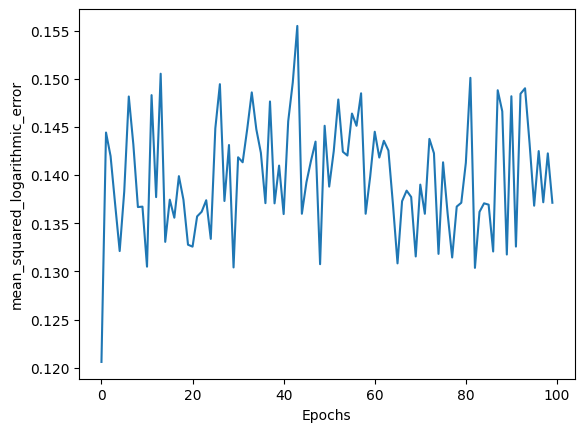

In [39]:
import matplotlib.pyplot as plt
def plot_history(history, key):
  plt.plot(history.history[key])
  # plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  # plt.legend([key, 'val_'+key])
  plt.show()
# Plot the history
plot_history(history, 'mean_squared_logarithmic_error')

In [40]:
model = Sequential()
model.add(LSTM(148, input_shape=(150, 1), return_sequences=True))
model.add(Dropout(0.2))
model.add(Dense(1, activation='softmax'))
model.compile(loss=msle, optimizer='adam', metrics=[msle])
# model.compile(
#     optimizer=sgd,
#     loss='binary_crossentropy', #similar to tf sigmoid_cross_entropy_with_logits
#     metrics=['acc']
# )

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 150, 148)          88800     
                                                                 
 dropout (Dropout)           (None, 150, 148)          0         
                                                                 
 dense_1 (Dense)             (None, 150, 1)            149       
                                                                 
Total params: 88949 (347.46 KB)
Trainable params: 88949 (347.46 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [42]:
history2 = model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=0)

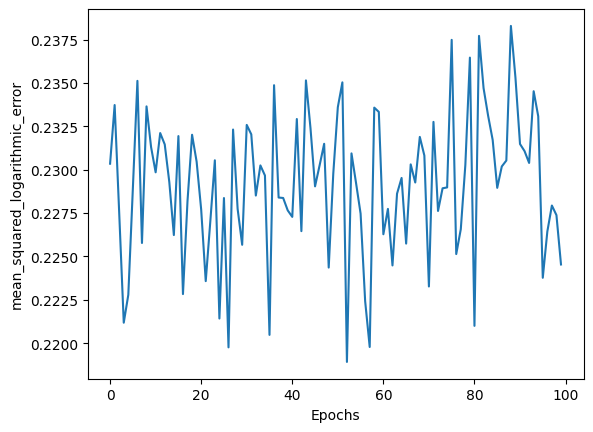

In [43]:
import matplotlib.pyplot as plt
def plot_history(history, key):
  plt.plot(history2.history[key])
  # plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  # plt.legend([key, 'val_'+key])
  plt.show()
# Plot the history
plot_history(history, 'mean_squared_logarithmic_error')

In [44]:
inputs = Input(shape=(150, 1))
x = LSTM(512,return_sequences=True)(inputs)
x = LSTM(256,return_sequences=True)(x)
x = LSTM(64,return_sequences=False)(x)
output_dep = Dense(1, activation='linear')(x)
model = Model([inputs], [output_dep])

model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss=msle, #similar to tf sigmoid_cross_entropy_with_logits
    metrics=[msle]
)
history = model.fit(X_train, y_train, epochs=100, verbose=0, batch_size=8)

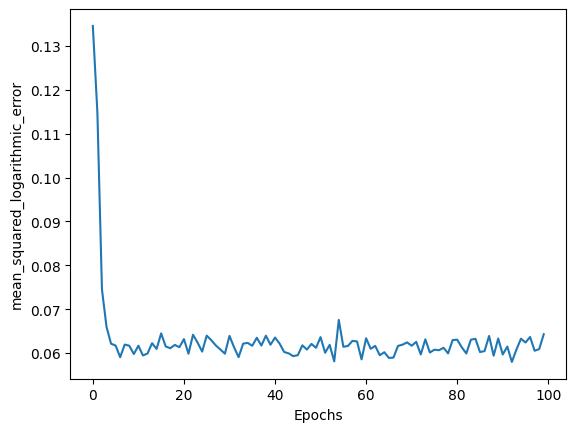

In [45]:
import matplotlib.pyplot as plt
def plot_history(history, key):
  plt.plot(history.history[key])
  # plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  # plt.legend([key, 'val_'+key])
  plt.show()
# Plot the history
plot_history(history, 'mean_squared_logarithmic_error')

In [ ]:
%%shell
jupyter nbconvert --to html '/content/drive/MyDrive/Colab Notebooks/LSTM.ipynb'

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/LSTM.ipynb to html
/usr/local/lib/python3.9/dist-packages/nbconvert/filters/widgetsdatatypefilter.py:71: UserWarning: Your element with mimetype(s) dict_keys(['application/vnd.colab-display-data+json']) is not able to be represented.
  warn(
[NbConvertApp] Writing 1157599 bytes to /content/drive/MyDrive/Colab Notebooks/LSTM.html
